In [22]:
import pandas as pd
import numpy as np
import feather
from sidecar import Sidecar
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = 'plotly_dark' # Comment this out if you don't use dark theme

In [44]:
beer_info = feather.read_dataframe('../data/aslin-beer-info-merged.feather')
#beer_info.loc[beer_info[beer_info.name.str.startswith('NomaComa')].index, 'abv'] = 8.0
#beer_info.loc[beer_info[beer_info.ibu > 1000000].index, 'ibu'] = np.nan
beer_info['rating'] = pd.to_numeric(beer_info['rating'])
beer_info['id'] = pd.to_numeric(beer_info['id'])
beer_info.head()

,abv,brewery,date,description,ibu,id,name,rating,style,num ratings
0,18.4,Aslin Beer Company,2018-01-04,Pinkies Up is an AVIPA that is clocking in at ...,NaN,2460710,Pinkies Up,4.05,IPA - Triple,1333
1,8.5,Aslin Beer Company,2018-06-28,Our collaboration with Southern Grist Brewing!...,NaN,2721897,Predictable Patterns,4.13,IPA - Imperial / Double,1256
2,15.0,Aslin Beer Company,2018-09-07,"Dreams is an Imperial stout with Almond, Cocon...",NaN,2834533,Dreams,4.43,Stout - Imperial / Double,1259
3,15.0,Aslin Beer Company,2016-03-05,Imperial Bisc,NaN,1454711,Buongiorno,4.25,Stout - Imperial / Double,1255
4,4.5,Aslin Beer Company,2017-08-16,Never A Bride is a Petite Saison fermented on ...,NaN,2245866,Never A Bride,3.63,Saison / Farmhouse Ale,1152


In [45]:
beer_info['num ratings'].max()

10741

In [46]:
columns = [column for column in beer_info if beer_info[column].dtype == float or beer_info[column].dtype == int]

In [47]:
data = pd.DataFrame({'style': beer_info['style'].str.split(' ', expand=True)[0],
                     'abv': pd.cut(beer_info.abv, 5, precision=0), 
                     'date': beer_info.date.apply(lambda x: x.year),
                     'rating': pd.cut(beer_info.rating, 5, precision=1),
                     'num ratings': pd.cut(beer_info['num ratings'], [0, 10, 100, 1000, 10000, 100000])})
data

,style,abv,date,rating,num ratings
0,IPA,"(15.0, 18.0]",2018,"(3.9, 4.1]","(1000, 10000]"
1,IPA,"(6.0, 9.0]",2018,"(4.1, 4.4]","(1000, 10000]"
2,Stout,"(12.0, 15.0]",2018,"(4.4, 4.6]","(1000, 10000]"
3,Stout,"(12.0, 15.0]",2016,"(4.1, 4.4]","(1000, 10000]"
4,Saison,"(3.0, 6.0]",2017,"(3.6, 3.9]","(1000, 10000]"
5,Scotch,"(6.0, 9.0]",2015,"(3.9, 4.1]","(1000, 10000]"
6,IPA,"(6.0, 9.0]",2018,"(3.9, 4.1]","(1000, 10000]"
7,IPA,"(6.0, 9.0]",2016,"(3.9, 4.1]","(1000, 10000]"
8,Stout,"(9.0, 12.0]",2018,"(4.1, 4.4]","(1000, 10000]"
9,Sour,"(3.0, 6.0]",2017,"(3.9, 4.1]","(1000, 10000]"


In [48]:
fig = go.FigureWidget()
dims = []
for column in data:
    dims.append(go.parcats.Dimension(
        values=data[column].astype(str),#.str.replace('.0', ''),
        categoryorder='array',
        label=column))
    color = pd.Categorical(data['rating']).codes
parcats = fig.add_parcats(dimensions=dims,
                          line={'color': color, 'colorscale': None, 'shape': 'hspline'},
                          hoveron='color',
                          hoverinfo='count+probability',
#                          labelfont={'size': 18, 'family': 'Times'},
#                          tickfont={'size': 16, 'family': 'Times'},
                          arrangement='freeform')
fig

FigureWidget({
    'data': [{'arrangement': 'freeform',
              'dimensions': [{'categoryorder': 'array'…

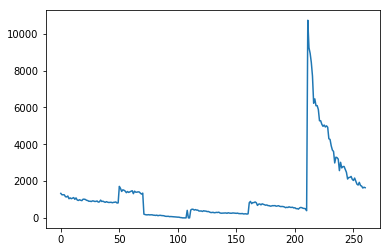

In [50]:
%matplotlib inline
beer_info['num ratings'].plot()

In [87]:
np.linspace(2010, 2020, 6)

array([2010., 2012., 2014., 2016., 2018., 2020.])